Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(384, 512)
<class 'numpy.ndarray'>


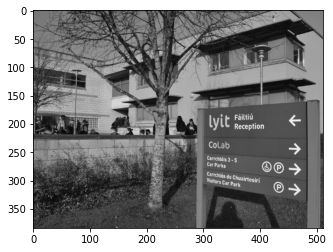

(384, 512, 3)


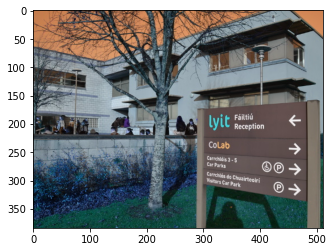

In [4]:
from google.colab import drive
from matplotlib import pyplot as plt

import numpy as np
import cv2
%matplotlib inline
drive.mount('/content/gdrive')

# Load in Grayscale
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/home.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
# The underlying representation is a numpy array.
print(type(img))

plt.imshow(img, cmap="gray")
plt.show()

# Load in BGR
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/home.jpg')
print(img.shape)
plt.imshow(img)
plt.show()

The first image is displayed using Grayscale. The second image is displayed using BGR (Blue, Green, Red) which is the traditional colour code channel used by OpenCV. It will need to be converted to plot in something other than OpenCV. It is important to use it consistently, if converting remember that it has been converted. If not, convert it at the end for the final output. In Colab, you cannot use the standard OpenCV 'imshow' function, so we use matplotlib.

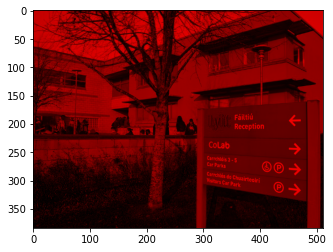

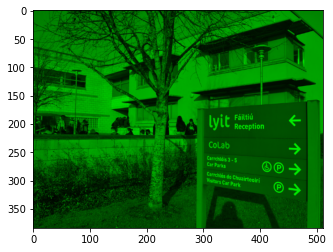

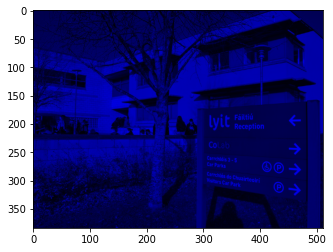

In [0]:
img_red = img.copy()
img_red[:, :, 1] = 0    # Zero out contribution from green
img_red[:, :, 2] = 0    # Zero out contribution from blue
plt.imshow(img_red)
plt.show()

img_green = img.copy()
img_green[:, :, 0] = 0    # Zero out contribution from red
img_green[:, :, 2] = 0    # Zero out contribution from blue
plt.imshow(img_green)
plt.show()

img_blue = img.copy()
img_blue[:, :, 0] = 0    # Zero out contribution from red
img_blue[:, :, 1] = 0    # Zero out contribution from green
plt.imshow(img_blue)
plt.show()

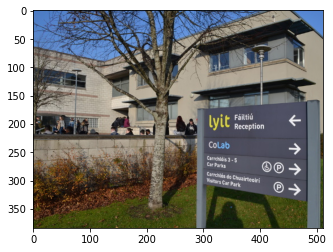

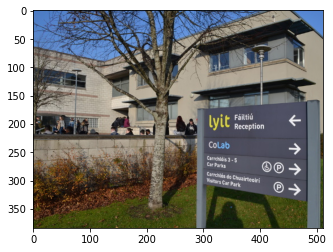

In [0]:
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(imgrgb)
plt.show()

# Or, use numpy functions - indexing!
imgrgb = img[:,:,::-1]
plt.imshow(imgrgb)
plt.show()

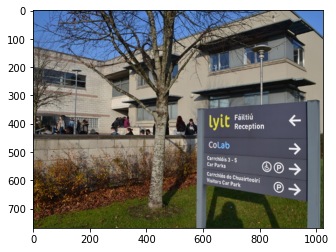

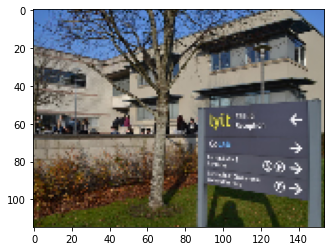

In [0]:
# Expanding
res = cv2.resize(imgrgb, None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

# Shrinking
res = cv2.resize(imgrgb, None,fx=.3, fy=.3, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

# Image Transformation

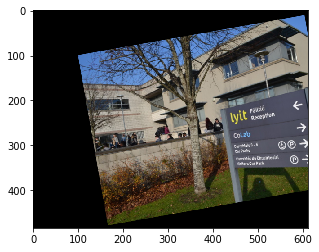

In [0]:
#@title Transformation Parameters { run: "auto" }

theta_degrees = 350 #@param {type:"slider", min:0, max:360, step:10}
shift_x = 100 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = 100 #@param {type:"slider", min:-100, max:100, step:2}

"""
| cos(theta) -sin(theta) tx | 
| sin(theta)  cos(theta) ty |
"""

rows, cols, _ = imgrgb.shape

radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)
res = cv2.warpAffine(imgrgb, M, (cols,rows))

plt.imshow(res)
plt.show()


# Image Manipulation
For certain tasks (i.e object detection), the image needs to be processed before it is fed into our module, for better results. Here, we go over some advanced image manipulation techniques.

Things like blurring, smoothing, and thresholding can be useful for things where we can make strong assumptions. For example, when we know our lane markings will be white, we can threshold our image pixels to filter out the values that aren't close enough to "white", which is represented (in RGB / BGR) as (255, 255, 255)

You can also do things like Background Subtraction, which will expose differences in between frames.

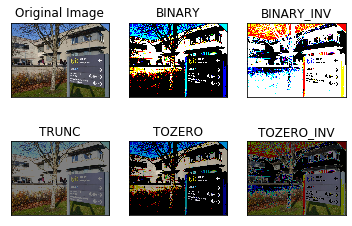

In [0]:
# make things easier!
img = imgrgb

# Thresholding is cool
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

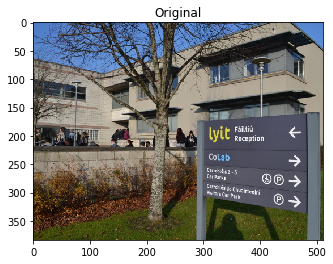

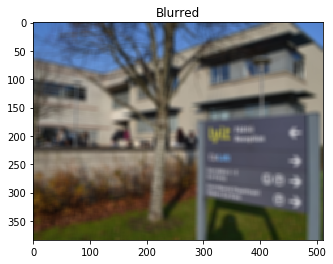

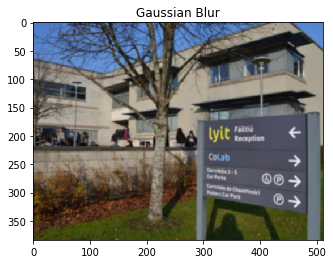

In [0]:
# Blurring - smoothes the image out
blur = cv2.blur(img,(10, 10))
gblur = cv2.GaussianBlur(imgrgb,(5,5),0)

plt.imshow(img), plt.title('Original')
plt.show()
plt.imshow(blur), plt.title('Blurred')
plt.show()
plt.imshow(gblur),plt.title('Gaussian Blur')
plt.show()

# Challenge

Create three images showing the above picture in yellow, pink (magenta) and light blue.